# Data Collection & Preparation

## Author: Joe Muscolino
Last updated: 03-17-2024

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import locale
import scipy
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import norm
from scipy import stats

## 1. Data Collection and Wrangling

In [2]:
# Open CSV file
reservations_df = pd.read_csv("ReservationsData-Dec2023.csv", dtype="string")

# View dataset shape (rows, columns)
reservations_df.shape

(143273, 26)

### Our dataset contains 143,273 customer rental records.

In [3]:
# View first 5 rows of DataFrame
reservations_df.head()

,Reservation Created Date,Pickup Date,Dropoff Date,Current State,Airport Code,Fleet Type,Local Rental,Reservation ID,User Created Date,mostRecentCreditCardCity,...,Cancelled At Time,Reservation Created Time,Rebook Status,Last Completed Reservation Date,First Completed Reservation Date,First Booked Reservation Actual Pickup Time,Lifetime Driving Days,userID,Sales Revenue,booked_with_code
0,7/18/23,7/27/23,8/3/23,finished,Store 1,Sport Sedan,No,1242522,7/15/23,Hillsborough,...,<NA>,7/18/23 14:00,unique,7/27/23,7/27/23,7/27/23,7,96104966,438.25,1
1,2/16/23,8/4/23,8/14/23,started,Store 2,Premium SUV,Yes,1219503,5/6/20,New York,...,<NA>,2/16/23 19:49,unique,7/27/23,5/7/20,<NA>,114,82920563,680.35,1
2,8/3/23,8/4/23,8/5/23,started,Store 3,SUV,No,1244748,2/6/19,Austin,...,<NA>,8/3/23 20:27,unique,2/7/23,4/25/19,<NA>,17,66304067,131.0,0
3,6/15/23,7/24/23,8/4/23,finished,Store 4,Premium SUV,No,1237785,6/15/23,Glenview,...,<NA>,6/15/23 2:51,unique,<NA>,<NA>,7/24/23,11,95743569,1037.47,1
4,7/30/23,8/4/23,8/6/23,started,Store 3,Premium SUV,No,1244193,6/26/19,New York,...,<NA>,7/30/23 21:37,unique,2/23/23,6/27/19,<NA>,48.25,72437962,394.26,0


In [4]:
# Get Percent of missing data in each column, convert values from a decimal to a percentage and round to 2 decimal places.
missing_data = round(reservations_df.isna().sum() / len(reservations_df) * 100, 2)
missing_data

Reservation Created Date 0.00
Pickup Date 0.00
Dropoff Date 0.00
Current State 0.00
Airport Code 0.00
Fleet Type 0.00
Local Rental 0.00
Reservation ID 0.00
User Created Date 0.00
mostRecentCreditCardCity 13.64
mostRecentCreditCardState 13.65
mostRecentCreditCardZip 13.64
Reservation Updated At In Timezone Time 0.00
Lifetime Completed Reservations 0.01
Average Daily Rate 0.00
Booking Length 0.00
Cancelled At Time 51.84
Reservation Created Time 0.00
Rebook Status 0.00
Last Completed Reservation Date 22.52
First Completed Reservation Date 22.52
First Booked Reservation Actual Pickup Time 86.83
Lifetime Driving Days 0.00
userID 0.00
Sales Revenue 0.00
booked_with_code 0.00
dtype: float64

In [5]:
# View number of non-null values in each column, along with column data type. 
reservations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143273 entries, 0 to 143272
Data columns (total 26 columns):
 #   Column                                       Non-Null Count   Dtype 
---  ------                                       --------------   ----- 
 0   Reservation Created Date                     143273 non-null  string
 1   Pickup Date                                  143273 non-null  string
 2   Dropoff Date                                 143273 non-null  string
 3   Current State                                143273 non-null  string
 4   Airport Code                                 143273 non-null  string
 5   Fleet Type                                   143273 non-null  string
 6   Local Rental                                 143273 non-null  string
 7   Reservation ID                               143273 non-null  string
 8   User Created Date                            143273 non-null  string
 9   mostRecentCreditCardCity                     123724 non-null  string
 

Now that we have a better understanding of the dataset, i.e., dataframe shape, column data types, number of missing column values, and more, we can now begin to prepare the dataset for analysis. 

This process will consist of multiple steps but ultimately the goal is to:

**A)** Convert column data to correct Dtype, i.e., all columns are currently type *String*.

**B)** Drop unwanted data, and replace missing data where necessary.

**C)** Create additional dataframe columns to assist with analysis. 

### a. Convert column data types
Since all columns currently are of Dtype *string*, we need to convert numerical columns to type *Float*, 
as well as any date values to *Datetime*. This process helps ensure that there are no exceptions raised when analyzing the data.

In [6]:
# Convert Float columns.
reservations_df[["Lifetime Completed Reservations", "Sales Revenue", "Average Daily Rate", "Lifetime Driving Days", "booked_with_code"]] = \
    reservations_df[["Lifetime Completed Reservations", "Sales Revenue", "Average Daily Rate", "Lifetime Driving Days", "booked_with_code"]].astype("float")

In [7]:
# Convert Datetime columns
reservations_df["User Created Date"] = pd.to_datetime(reservations_df["User Created Date"])
reservations_df["Reservation Created Date"] = pd.to_datetime(reservations_df["Reservation Created Date"])
reservations_df["Reservation Created Time"] = pd.to_datetime(reservations_df["Reservation Created Time"])
reservations_df["Pickup Date"] = pd.to_datetime(reservations_df["Pickup Date"])
reservations_df["Dropoff Date"] = pd.to_datetime(reservations_df["Dropoff Date"])
reservations_df["First Completed Reservation Date"] = pd.to_datetime(reservations_df["First Completed Reservation Date"])
reservations_df["Last Completed Reservation Date"] = pd.to_datetime(reservations_df["Last Completed Reservation Date"])
reservations_df["Cancelled At Time"] = pd.to_datetime(reservations_df["Cancelled At Time"])

In [8]:
# Generates descriptive statistics about our DataFrame. Values should be rounded to 2 decimal places.
reservations_df.describe().round(2)

,Lifetime Completed Reservations,Average Daily Rate,Lifetime Driving Days,Sales Revenue,booked_with_code
count,143256.00,143273.00,143273.00,143273.00,143273.00
mean,7.78,112.81,52.23,403.92,0.43
std,18.92,35.44,183.84,373.63,0.49
min,0.00,10.71,0.00,0.95,0.00
25%,1.00,88.00,6.00,161.00,0.00
50%,2.00,107.50,15.00,303.25,0.00
75%,7.00,132.00,47.00,515.00,1.00
max,584.00,410.00,5701.00,9890.00,1.00


### b. Drop unwanted columns and rename column headers.

In [9]:
# Drop unwanted columns or columns missing a lot of data. 
reservations_df.drop(columns=["First Booked Reservation Actual Pickup Time", "Reservation Updated At In Timezone Time"], inplace=True)
# Rename columns that have long or ambiguous names. 
reservations_df.rename(columns={"mostRecentCreditCardZip":"Zip", "mostRecentCreditCardCity":"City", "mostRecentCreditCardState":"State", "Sales Revenue":"sales_rev",
                                "Lifetime Completed Reservations":"lifetime_completed_reservations", "Lifetime Driving Days":"lifetime_driving_days", "Airport Code":"Store Code",
                                "Average Daily Rate": "avg_daily_rate"}, inplace=True)

In [10]:
# View column information now to see the how to dataframe has been altered.
reservations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143273 entries, 0 to 143272
Data columns (total 24 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Reservation Created Date          143273 non-null  datetime64[ns]
 1   Pickup Date                       143273 non-null  datetime64[ns]
 2   Dropoff Date                      143273 non-null  datetime64[ns]
 3   Current State                     143273 non-null  string        
 4   Store Code                        143273 non-null  string        
 5   Fleet Type                        143273 non-null  string        
 6   Local Rental                      143273 non-null  string        
 7   Reservation ID                    143273 non-null  string        
 8   User Created Date                 143273 non-null  datetime64[ns]
 9   City                              123724 non-null  string        
 10  State                           

### c. *Replace* data in columns where necessary.
The reason for doing this is two-part– First, we want to replace missing values in certain columns. Second, for better use during analysis, we may want to replace certain column values that are ambiguous or redundant. 
For example, the column 'Current State' has six unique values: *finished, started, booked, cancelled, no_showed, payment_declined_cancelled*.

But for the purpose of this analysis, we aren't interested in differentiating between *cancelled, no_showed,* or *payment_declined_cancelled*, so we will replace each instance of ***no_showed***, or ***payment_declined_cancelled*** with ***cancelled***

In [11]:
# View unique values before replacing data.
print(reservations_df["Current State"].unique())
# Modify column 'Current State' to contain only 3 different statuses
reservations_df["Current State"] = reservations_df["Current State"].replace(["no_showed", "payment_declined_cancelled"], 'cancelled')
# Current State column values after replacing unwanted values.
print(reservations_df["Current State"].unique())

# Replace missing data with string value 'NONE' as we don't want to drop records where this information may be missing. 
reservations_df[["Zip", "City", "State"]] = reservations_df[["Zip", "City", "State"]].replace(np.nan, "NONE")

<StringArray>
[                  'finished',                    'started',
                     'booked',                  'cancelled',
                  'no_showed', 'payment_declined_cancelled']
Length: 6, dtype: string
<StringArray>
['finished', 'started', 'booked', 'cancelled']
Length: 4, dtype: string


### d. Reformat dataframe column positions
Position *Rebook Status* next to *Current State* for easier interpretation of the data when viewing. 

In [12]:
# Insert column 'Rebook Status' next to 'Current State'.
col = reservations_df.pop('Rebook Status')
reservations_df.insert(4, col.name, col)

In [13]:
# Get Percent of missing data in each column, convert the missing_data from a 
# decimal to a percentage and round to 2 decimal places.
missing_data2 = round(reservations_df.isna().sum() / len(reservations_df) * 100, 2)
missing_data2

Reservation Created Date 0.00
Pickup Date 0.00
Dropoff Date 0.00
Current State 0.00
Rebook Status 0.00
Store Code 0.00
Fleet Type 0.00
Local Rental 0.00
Reservation ID 0.00
User Created Date 0.00
City 0.00
State 0.00
Zip 0.00
lifetime_completed_reservations 0.01
avg_daily_rate 0.00
Booking Length 0.00
Cancelled At Time 51.84
Reservation Created Time 0.00
Last Completed Reservation Date 22.52
First Completed Reservation Date 22.52
lifetime_driving_days 0.00
userID 0.00
sales_rev 0.00
booked_with_code 0.00
dtype: float64

### e. Create additional columns to extract the month and year that reservation activity is occurring. 

### Created Month, Created Year, Dropoff Month, Pickup Month
The main reason for adding these columns has nothing to do with what we'll be doing in this analysis, but rather for use if this DataFrame were to be exported and used to build out a dashboard using software such as Tableau. While many of these services offer you the ability to extract the month and year from a given date, it is sometimes easier to just add the data while performing cleanup. 

In [14]:
# Create a "Created Month" column to display the Month that the reservation was created in.
reservations_df["Created Period"] = reservations_df["Reservation Created Date"].dt.strftime('%Y-%m')
# Create a "Created Month Name" column to display the Month Name that the reservation was created in.
reservations_df["Created Month"] = reservations_df["Reservation Created Date"].dt.month
# Create a "Created Year" column to display the Year that the reservation was created in.
reservations_df["Created Year"] = reservations_df["Reservation Created Date"].dt.strftime('%Y')
# Create a "Pickup Month" column to display the Month that the reservation was started in.
reservations_df["Pickup Month"] = reservations_df["Pickup Date"].dt.month
# Create a "Dropoff Month" column to display the Month that the reservation was ended in.
reservations_df["Dropoff Month"] = reservations_df["Dropoff Date"].dt.month
# View new columns
reservations_df[["Reservation Created Date","Created Period","Created Month","Created Year", "Pickup Month", "Dropoff Month"]].head()

,Reservation Created Date,Created Period,Created Month,Created Year,Pickup Month,Dropoff Month
0,2023-07-18,2023-07,7,2023,7,8
1,2023-02-16,2023-02,2,2023,8,8
2,2023-08-03,2023-08,8,2023,8,8
3,2023-06-15,2023-06,6,2023,7,8
4,2023-07-30,2023-07,7,2023,8,8


#### reservation_length
While this data will be useful when performing a trend analysis, one of the main reasons we want this column is so we can differentiate which customers are in ***short-term*** vs ***long-term*** rentals.

In [15]:
# Create column 'reservation_length' to understand how long customer reservations are. 
reservations_df["reservation_length"] = [d.days for d in (reservations_df["Dropoff Date"] - reservations_df["Pickup Date"])]

#### booked_window
The column ***booked_window*** will represent the total number of days from when a customer created their reservation and when they are going to pick it up. 

Having this information allows us to better understand how far in advance customers tend to book. With this data, Marketing teams can more accurately target customers with specific offers or info. 

In [16]:
# Create column 'booked_window' to understand how many days out from the Pickup date each customer is creating their reservation. 
reservations_df["booked_window"] = [d.days for d in (reservations_df["Pickup Date"] - reservations_df["Reservation Created Date"])]

#### time_as_customer
The column ***time_as_customer*** will represent the total number of days from when a customer created their reservation and when they are going to pick it up. 

Having this information allows us to better understand how far in advance customers tend to book. With this data, Marketing teams can more accurately target customers with specific offers or info. 

In [17]:
# Create column 'time_as_customer' to understand how long ago each customer joined at the time of creating a new reservation.
# This means a unique customer with multiple created reservations will have different 'time_as_customer' values for each record.

# Modify column to just display the number of days as an integer. 
reservations_df["time_as_customer"] = [d.days for d in (reservations_df["Reservation Created Date"] - reservations_df["User Created Date"])]

---

### 2f. Remove outliers from dataset

Now that we've created several new Dataframe columns, we must identify any outliers in the data that could potentially skew the outcome of our results when analyzing the data. To do this, we will first create a copy of the original dataframe and then remove the identified outliers. 

In [18]:
reservations_df.describe().round(2)

,lifetime_completed_reservations,avg_daily_rate,lifetime_driving_days,sales_rev,booked_with_code,Created Month,Pickup Month,Dropoff Month,reservation_length,booked_window,time_as_customer
count,143256.00,143273.00,143273.00,143273.00,143273.00,143273.00,143273.00,143273.00,143273.00,143273.00,143273.00
mean,7.78,112.81,52.23,403.92,0.43,5.96,6.38,6.36,3.85,27.51,636.06
std,18.92,35.44,183.84,373.63,0.49,3.31,3.32,3.31,4.50,39.73,777.59
min,0.00,10.71,0.00,0.95,0.00,1.00,1.00,1.00,0.00,-5.00,0.00
25%,1.00,88.00,6.00,161.00,0.00,3.00,4.00,4.00,1.00,1.00,0.00
50%,2.00,107.50,15.00,303.25,0.00,6.00,6.00,6.00,3.00,10.00,284.00
75%,7.00,132.00,47.00,515.00,1.00,9.00,9.00,9.00,4.00,37.00,1084.00
max,584.00,410.00,5701.00,9890.00,1.00,12.00,12.00,12.00,91.00,1040.00,3819.00


1. #### booked_window

Using the describe() method above, we can see that the minimum column value is -5. A negative value in this column would imply that the Dropoff Date
occurred before the Pickup Date, which can not be the case. We'll assume these records are invalid and drop them.

Aside from the negative value, we can also see that our max column value, 1040 days, lies very far from our mean value of 27.5. Therefore, to ensure accuracy when measuring certain metrics, we'll remove the extreme outliers in both directions. 

In [19]:
# Find out what percent of data falls within certain range in order to minimize outliers.
overall_mean = reservations_df["booked_window"].mean()
overall_std = reservations_df["booked_window"].std()
upper_lim = overall_mean + 3 * overall_std
print(f'Upper Limit of column: {round(upper_lim,2)} days')

# Create Subset of outliers in booked_window column.
temp_df = reservations_df[(reservations_df["booked_window"] < 0) | (reservations_df["booked_window"] >= upper_lim)]
print(f'Percent of records considered outliers: {round(temp_df.shape[0] / len(reservations_df) * 100,2)}%')

Upper Limit of column: 146.68 days
Percent of records considered outliers: 2.65%


#### Since booked_window will be used to analyze customer behavior frequently throughout the analysis, we will remove the outlier values to avoid inaccuracies in our insights. 

In [20]:
# Modify dataframe so that it only contains customer records with a booked_window that fall in our given range.
cleaned_df = reservations_df[(reservations_df["booked_window"] >= 0) & (reservations_df["booked_window"] <= upper_lim)]

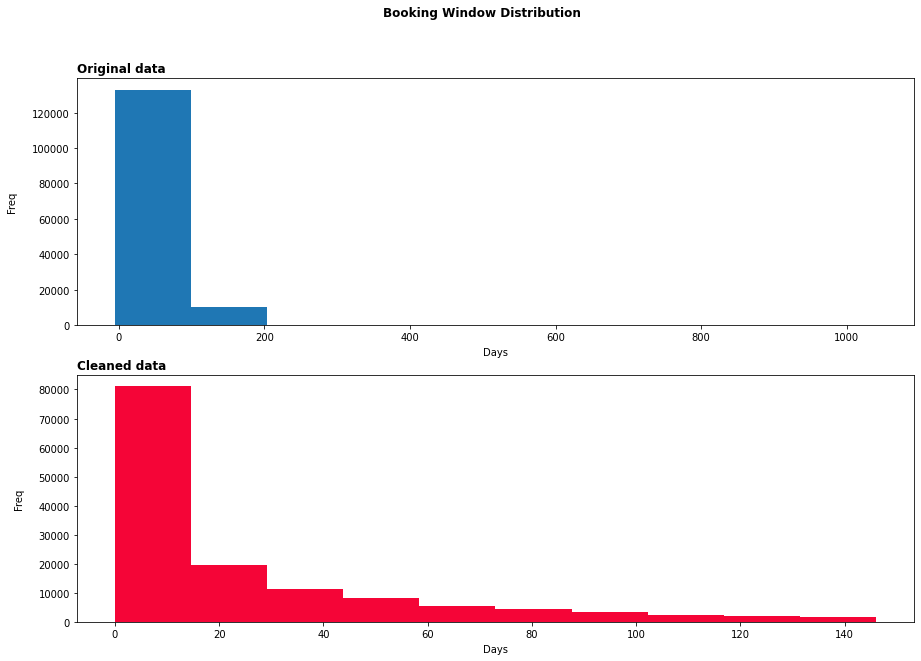

In [21]:
# Create histogram using reservation_length
plt.rcParams.update({'font.size': 12})
fig, axs = plt.subplots(2,figsize=(15,10), sharex=False)
fig.suptitle('Booking Window Distribution',fontweight='bold')

# Population
axs[0].hist(reservations_df["booked_window"])
axs[1].hist(cleaned_df["booked_window"], color="#f50537")

axs[0].set_title("Original data",loc='left',fontweight='bold')
axs[1].set_title("Cleaned data",loc='left',fontweight='bold')

# Set axis labels
axs[0].set_xlabel('Days', labelpad=5)
axs[1].set_xlabel('Days', labelpad=5)
axs[0].set_ylabel('Freq', labelpad=15)
axs[1].set_ylabel('Freq', labelpad=15)
plt.show()

2. #### reservation_length

For the purpose of this analysis we are only going to focus on rentals that have a ***reservation_length less than 30 days***. This is because rentals that are 30 days or longer only occur at certain store locations and are priced at a different daily rate. Therefore, we'll remove these records to avoid skewing our data.. 

In [22]:
# How many customers have a reservation_length that is > 30 days?
gt30days = reservations_df[reservations_df["reservation_length"] > 30]
print(f'Percent of reservations longer than 30 days: {round(gt30days.shape[0] / len(reservations_df) * 100,2)}%')

Percent of reservations longer than 30 days: 0.09%


In [23]:
# Get all reservations that have a length of no more than 30 days.
cleaned_df = cleaned_df[cleaned_df["reservation_length"] <= 30]

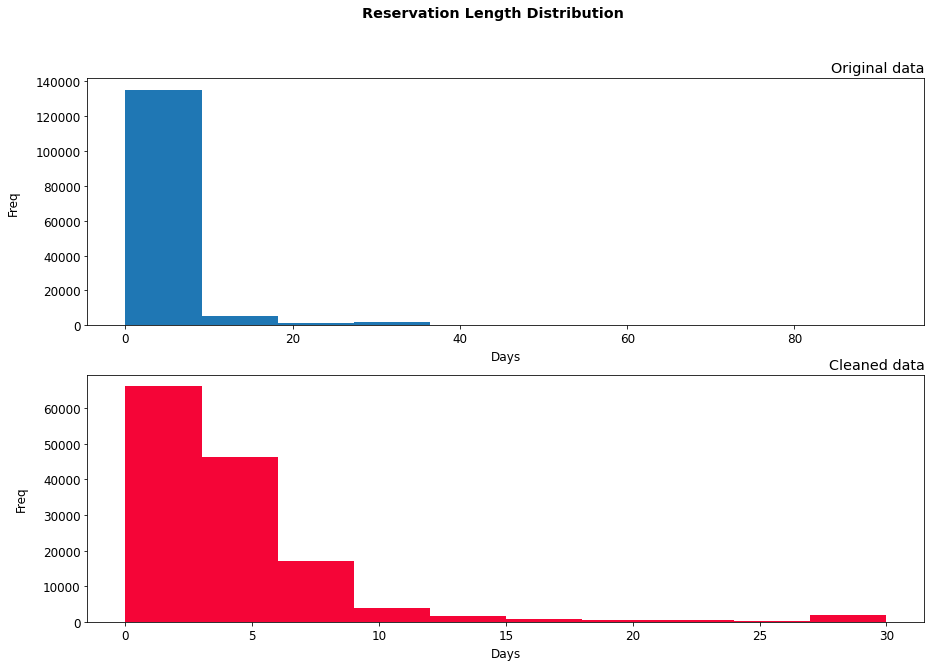

In [24]:
# Create histogram using reservation_length
plt.rcParams.update({'font.size': 12})
fig, axs = plt.subplots(2,figsize=(15,10), sharex=False)
fig.suptitle('Reservation Length Distribution',fontweight='bold')

# Population
axs[0].hist(reservations_df["reservation_length"])
axs[1].hist(cleaned_df["reservation_length"], color="#f50537")

axs[0].set_title("Original data",loc='right')
axs[1].set_title("Cleaned data",loc='right')

# Set axis labels
axs[0].set_xlabel('Days', labelpad=5)
axs[1].set_xlabel('Days', labelpad=5)
axs[0].set_ylabel('Freq', labelpad=15)
axs[1].set_ylabel('Freq', labelpad=15)
plt.show()

## Review cleaned dataset.

In [25]:
cleaned_df.shape

(139349, 32)

In [26]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139349 entries, 0 to 143272
Data columns (total 32 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Reservation Created Date          139349 non-null  datetime64[ns]
 1   Pickup Date                       139349 non-null  datetime64[ns]
 2   Dropoff Date                      139349 non-null  datetime64[ns]
 3   Current State                     139349 non-null  string        
 4   Rebook Status                     139349 non-null  string        
 5   Store Code                        139349 non-null  string        
 6   Fleet Type                        139349 non-null  string        
 7   Local Rental                      139349 non-null  string        
 8   Reservation ID                    139349 non-null  string        
 9   User Created Date                 139349 non-null  datetime64[ns]
 10  City                            

## 2. Data Analysis and Visualization